### 텐서플로우 Object Detection API
https://github.com/tensorflow/models/tree/master/research/object_detection  


In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display
import time

print("버전: ", tf.__version__)
print("즉시 실행 모드: ", tf.executing_eagerly())
print("GPU ", "사용 가능" if tf.config.experimental.list_physical_devices("GPU") else "사용 불가능")


버전:  2.2.0
즉시 실행 모드:  True
GPU  사용 불가능


In [5]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

print('util modeules load ok')

util modeules load ok


In [6]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

print('tf compat ready ok')


tf compat ready ok


In [7]:

model_name = 'ssd_mobilenet_v1_coco_2017_11_17'
model_dir = f"./data/{model_name}/saved_model"
model = tf.saved_model.load(str(model_dir))
model = model.signatures['serving_default']
print(f'{model_name} load ok')
print(model.inputs)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
ssd_mobilenet_v1_coco_2017_11_17 load ok
[<tf.Tensor 'image_tensor:0' shape=(None, None, None, 3) dtype=uint8>]


In [8]:

category_index = label_map_util.create_category_index_from_labelmap('./data/mscoco_label_map.pbtxt', use_display_name=True)
print(category_index)

{1: {'id': 1, 'name': 'person'}, 2: {'id': 2, 'name': 'bicycle'}, 3: {'id': 3, 'name': 'car'}, 4: {'id': 4, 'name': 'motorcycle'}, 5: {'id': 5, 'name': 'airplane'}, 6: {'id': 6, 'name': 'bus'}, 7: {'id': 7, 'name': 'train'}, 8: {'id': 8, 'name': 'truck'}, 9: {'id': 9, 'name': 'boat'}, 10: {'id': 10, 'name': 'traffic light'}, 11: {'id': 11, 'name': 'fire hydrant'}, 13: {'id': 13, 'name': 'stop sign'}, 14: {'id': 14, 'name': 'parking meter'}, 15: {'id': 15, 'name': 'bench'}, 16: {'id': 16, 'name': 'bird'}, 17: {'id': 17, 'name': 'cat'}, 18: {'id': 18, 'name': 'dog'}, 19: {'id': 19, 'name': 'horse'}, 20: {'id': 20, 'name': 'sheep'}, 21: {'id': 21, 'name': 'cow'}, 22: {'id': 22, 'name': 'elephant'}, 23: {'id': 23, 'name': 'bear'}, 24: {'id': 24, 'name': 'zebra'}, 25: {'id': 25, 'name': 'giraffe'}, 27: {'id': 27, 'name': 'backpack'}, 28: {'id': 28, 'name': 'umbrella'}, 31: {'id': 31, 'name': 'handbag'}, 32: {'id': 32, 'name': 'tie'}, 33: {'id': 33, 'name': 'suitcase'}, 34: {'id': 34, 'name'

### 이미지 로딩 
주의사항 : 이미지 싸이즈가 홀수이면 안된다.  tensor형으로 변환 실패한다.  

In [9]:
#image_path = '../res/chinagirl.jpg'
image_path = '../res/bird3.jpg'
print('load image')
image_np = np.array(Image.open(image_path))
print(image_np.shape)
print(type( image_np))

load image
(525, 700, 3)
<class 'numpy.ndarray'>


In [10]:
# image = np.asarray(image_np)
# print(type( image))

  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image_np)

  # The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
print('start inference')
start_tick = time.time()
output_dict = model(input_tensor)

# print(output_dict)

print(f'end inference { time.time() - start_tick}')

num_detections = int(output_dict.pop('num_detections'))
output_dict = {key:value[0, :num_detections].numpy() for key,value in output_dict.items()}
output_dict['num_detections'] = num_detections
# detection_classes should be ints.
output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)


# print ( [key for key,value in output_dict.items() ] )
# print ( output_dict['detection_classes'] )
# print ( output_dict['detection_scores'] > 0.5 )




start inference
end inference 4.256027698516846


In [11]:
print(output_dict['num_detections'])
print ( [key for key,value in output_dict.items() ] )

100
['detection_classes', 'detection_boxes', 'detection_scores', 'num_detections']


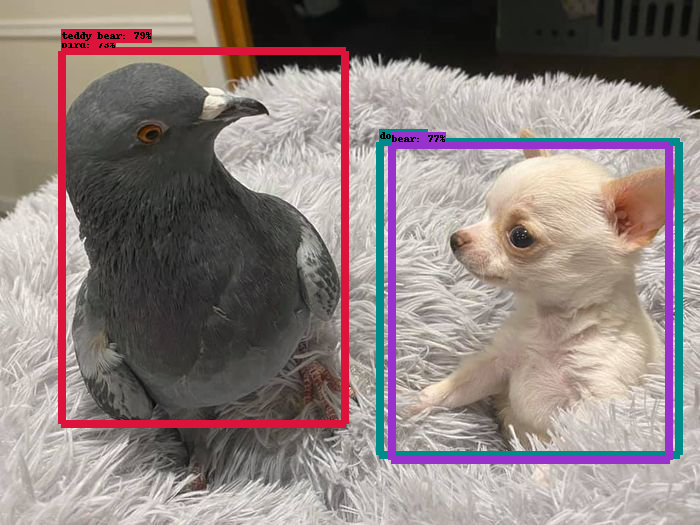

draw delay 0.21189188957214355


In [12]:
start_tick = time.time()
_img_temp = image_np.copy()
vis_util.visualize_boxes_and_labels_on_image_array(
      _img_temp,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)

display(Image.fromarray(_img_temp))

print(f'draw delay { time.time() - start_tick}')